In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
url = './Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Data Overview

In [4]:
# df.describe().transpose()

In [5]:
# for i in range(len(df.columns)):
#     missing_data = df[df.columns[i]].isna().sum()
#     perc = missing_data / len(df) * 100
#     print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

<AxesSubplot:>

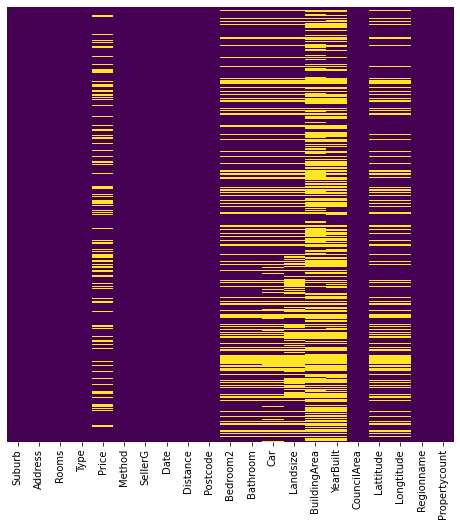

In [6]:
plt.figure(figsize = (8,8)) 
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Cleaning and Filling Missing data

In [7]:
df['Rooms_Beadroom2'] = df['Rooms'] - df['Bedroom2']
df['Rooms_Beadroom2']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34852    0.0
34853    0.0
34854    0.0
34855    NaN
34856    0.0
Name: Rooms_Beadroom2, Length: 34857, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           34857 non-null  object 
 1   Address          34857 non-null  object 
 2   Rooms            34857 non-null  int64  
 3   Type             34857 non-null  object 
 4   Price            27247 non-null  float64
 5   Method           34857 non-null  object 
 6   SellerG          34857 non-null  object 
 7   Date             34857 non-null  object 
 8   Distance         34856 non-null  float64
 9   Postcode         34856 non-null  float64
 10  Bedroom2         26640 non-null  float64
 11  Bathroom         26631 non-null  float64
 12  Car              26129 non-null  float64
 13  Landsize         23047 non-null  float64
 14  BuildingArea     13742 non-null  float64
 15  YearBuilt        15551 non-null  float64
 16  CouncilArea      34854 non-null  object 
 17  Lattitude   

In [9]:
df = df.drop(['Bedroom2', 'Rooms_Beadroom2'], 1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_524/3541725795.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['Bedroom2', 'Rooms_Beadroom2'], 1)


Text(0.5, 1.0, 'Longtitude')

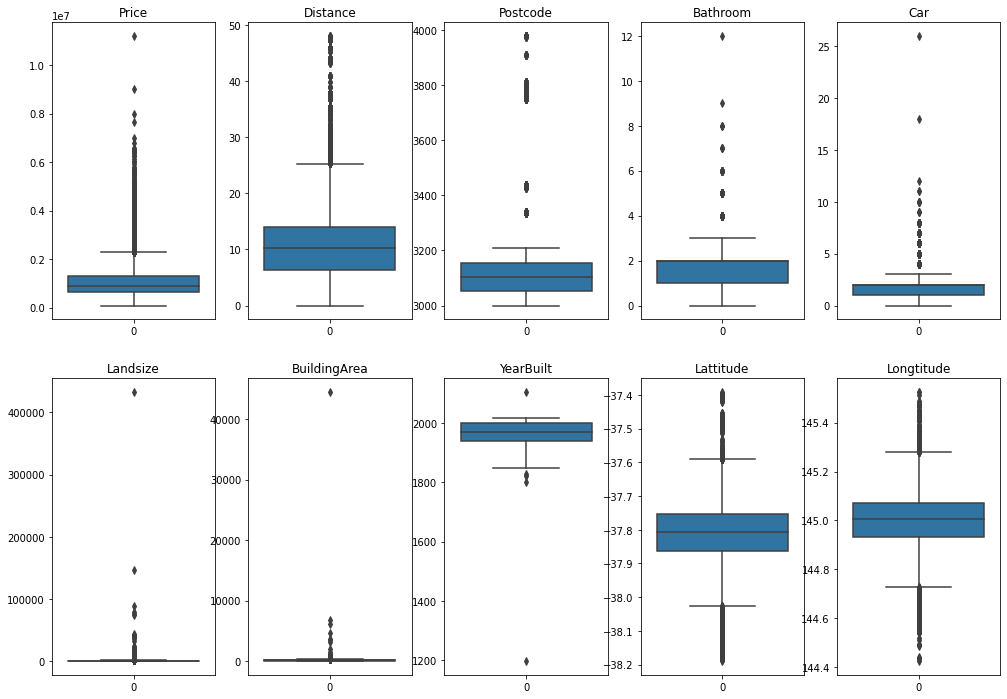

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(17, 12))
sns.boxplot(data=df['Price'], ax=ax[0, 0])
ax[0, 0].set_title('Price')
sns.boxplot(data=df['Distance'], ax=ax[0, 1])
ax[0, 1].set_title('Distance')
sns.boxplot(data=df['Postcode'], ax=ax[0, 2])
ax[0, 2].set_title('Postcode')
sns.boxplot(data=df['Bathroom'], ax=ax[0, 3])
ax[0, 3].set_title('Bathroom')
sns.boxplot(data=df['Car'], ax=ax[0, 4])
ax[0, 4].set_title('Car')
sns.boxplot(data=df['Landsize'], ax=ax[1, 0])
ax[1, 0].set_title('Landsize')
sns.boxplot(data=df['BuildingArea'], ax=ax[1, 1])
ax[1, 1].set_title('BuildingArea')
sns.boxplot(data=df['YearBuilt'], ax=ax[1, 2])
ax[1, 2].set_title('YearBuilt')
sns.boxplot(data=df['Lattitude'], ax=ax[1, 3])
ax[1, 3].set_title('Lattitude')
sns.boxplot(data=df['Longtitude'], ax=ax[1, 4])
ax[1, 4].set_title('Longtitude')
# plt.tight_layout

In [11]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values = np.nan, strategy='median')
mean_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')

#Replace missing value from numerical 
df[['Price']] = median_imputer.fit_transform(df[['Price']])
df[['Distance']] = median_imputer.fit_transform(df[['Distance']])
# distance_mean = round(df['Distance'].mean(),1)
# df['Distance'].fillna(distance_mean, inplace = True)

# postcode_median = round(df['Postcode'].median())
# df['Postcode'].fillna(postcode_median, inplace = True)
# df[['Postcode']] = median_imputer.fit_transform(df[['Postcode']])
df['Postcode'] = mean_imputer.fit_transform(df[['Postcode']])

df['Bathroom'] = mean_imputer.fit_transform(df[['Bathroom']])

df['Car'] = mean_imputer.fit_transform(df[['Car']])

df[['Landsize']] = median_imputer.fit_transform(df[['Landsize']])

df[['BuildingArea']] = median_imputer.fit_transform(df[['BuildingArea']])

df[['YearBuilt']] = mean_imputer.fit_transform(df[['YearBuilt']])

df['Lattitude'] = median_imputer.fit_transform(df[['Lattitude']])

df['Longtitude'] = median_imputer.fit_transform(df[['Longtitude']])


In [12]:
df = df.dropna(subset=['CouncilArea','Regionname', 'Propertycount'], axis=0)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = [x.year for x in df['Date']]
df['month'] = [x.month for x in df['Date']]

In [14]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
year             0
month            0
dtype: int64

In [15]:
suburbs = list(df.Suburb.value_counts().index)
len(suburbs)

350

In [16]:
df['Suburb'].shape

(34854,)

# Checking for outliers

In [17]:
data_numeric = df.select_dtypes(include=[np.number])
data_numeric.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'year', 'month'],
      dtype='object')

In [18]:
cols_num = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'year', 'month']

In [19]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [20]:
for s in cols_num:
    df[s] = BoxplotOutlierClipper().fit_transform(df[s])

Text(0.5, 1.0, 'Longtitude')

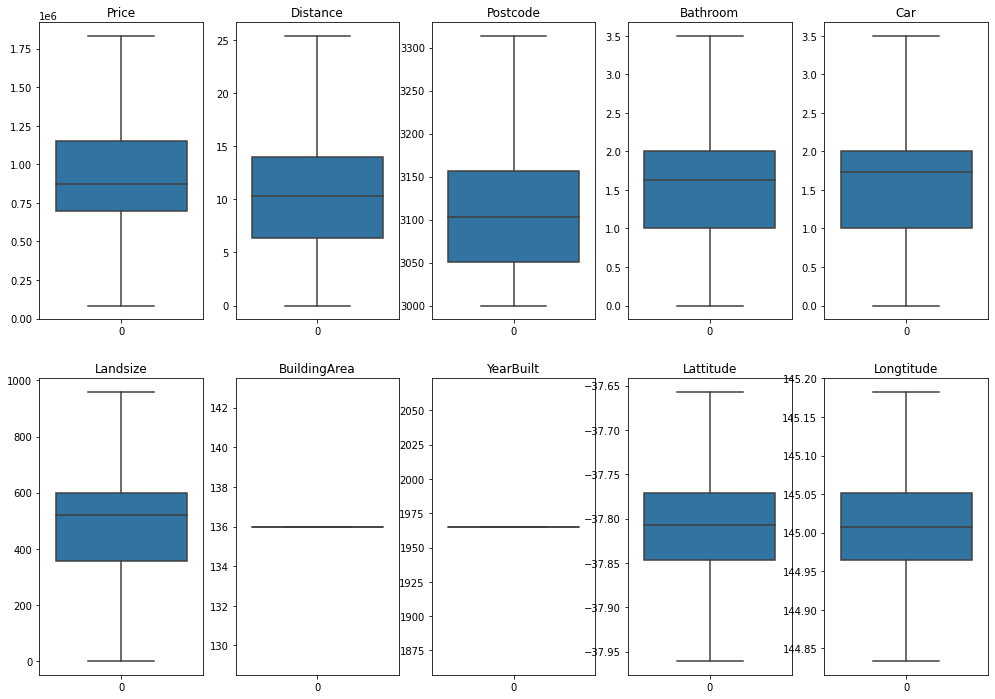

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(17, 12))
sns.boxplot(data=df['Price'], ax=ax[0, 0])
ax[0, 0].set_title('Price')
sns.boxplot(data=df['Distance'], ax=ax[0, 1])
ax[0, 1].set_title('Distance')
sns.boxplot(data=df['Postcode'], ax=ax[0, 2])
ax[0, 2].set_title('Postcode')
sns.boxplot(data=df['Bathroom'], ax=ax[0, 3])
ax[0, 3].set_title('Bathroom')
sns.boxplot(data=df['Car'], ax=ax[0, 4])
ax[0, 4].set_title('Car')
sns.boxplot(data=df['Landsize'], ax=ax[1, 0])
ax[1, 0].set_title('Landsize')
sns.boxplot(data=df['BuildingArea'], ax=ax[1, 1])
ax[1, 1].set_title('BuildingArea')
sns.boxplot(data=df['YearBuilt'], ax=ax[1, 2])
ax[1, 2].set_title('YearBuilt')
sns.boxplot(data=df['Lattitude'], ax=ax[1, 3])
ax[1, 3].set_title('Lattitude')
sns.boxplot(data=df['Longtitude'], ax=ax[1, 4])
ax[1, 4].set_title('Longtitude')
# plt.tight_layout

# Encode Categorical Data

## Label encoding

In [22]:
# da_suburb = df['Suburb'].value_counts().index
# da_suburb

In [23]:
# df['Address']

In [24]:
da_Address = df['Address']
da_Address_arr = []
da_Local_arr = []
for s in da_Address:
    if (s.find('/') == -1):
        da_Local_arr.append(0)
    else:
        da_Local_arr.append(1)
    da_Address_arr.append(s.split()[1])
# da_Address_arr
df['city'] = da_Address_arr
df['local'] = da_Local_arr

In [25]:
# df['city']

In [26]:
# df['SellerG'].value_counts()

In [27]:
df = df.drop(['Address'], axis = 1)

In [28]:
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year,month,city,local
0,Abbotsford,2.0,h,870000.0,SS,Jellis,2016-03-09,2.5,3067.0,1.000000,...,1965.289885,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016,3,Studley,0
1,Abbotsford,2.0,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.000000,...,1965.289885,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016,3,Turner,0
2,Abbotsford,2.0,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.000000,...,1965.289885,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016,4,Bloomburg,0
3,Abbotsford,3.0,u,870000.0,VB,Rounds,2016-04-02,2.5,3067.0,2.000000,...,1965.289885,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016,4,Victoria,1
4,Abbotsford,3.0,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.000000,...,1965.289885,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017,4,Charles,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4.0,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.000000,...,1965.289885,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018,2,Burns,0
34853,Yarraville,2.0,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.000000,...,1965.289885,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018,2,Murray,0
34854,Yarraville,2.0,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,1.000000,...,1965.289885,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018,2,Severn,0
34855,Yarraville,3.0,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,1.624798,...,1965.289885,Maribyrnong City Council,-37.80760,145.00780,Western Metropolitan,6543.0,2018,2,Stephen,1


In [29]:
# from sklearn.preprocessing import LabelEncoder
# # le = LabelEncoder()
# cat_cols = ['Suburb', 'CouncilArea', 'SellerG', 'city']
# cat_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('label', LabelEncoder())
# ])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
df['Suburb'] = le.fit_transform(df['Suburb'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])
df['SellerG'] = le.fit_transform(df['SellerG'])
df['city'] = le.fit_transform(df['city'])

## One-hot encoding

In [31]:
df = pd.get_dummies(df, columns=['Type'], prefix='Type')
df = pd.get_dummies(df, columns=['Method'], prefix='Method')
df = pd.get_dummies(df, columns=['Regionname'], prefix='Regionname')

In [32]:
df = df.drop(['Date'], axis=1)

In [33]:
df

,Suburb,Rooms,Price,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,2.0,870000.0,155,2.5,3067.0,1.000000,1.000000,126.0,136.0,...,0,0,0,0,1,0,0,0,0,0
1,0,2.0,1480000.0,33,2.5,3067.0,1.000000,1.000000,202.0,136.0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1035000.0,33,2.5,3067.0,1.000000,0.000000,156.0,136.0,...,0,0,0,0,1,0,0,0,0,0
3,0,3.0,870000.0,296,2.5,3067.0,2.000000,1.000000,0.0,136.0,...,1,0,0,0,1,0,0,0,0,0
4,0,3.0,1465000.0,33,2.5,3067.0,2.000000,0.000000,134.0,136.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4.0,1480000.0,152,6.3,3013.0,1.000000,3.000000,593.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34853,347,2.0,888000.0,321,6.3,3013.0,2.000000,1.000000,98.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34854,347,2.0,705000.0,152,6.3,3013.0,1.000000,2.000000,220.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34855,347,3.0,1140000.0,370,6.3,3013.0,1.624798,1.728845,521.0,136.0,...,0,0,0,0,0,0,0,0,1,0


## Feature Scaling

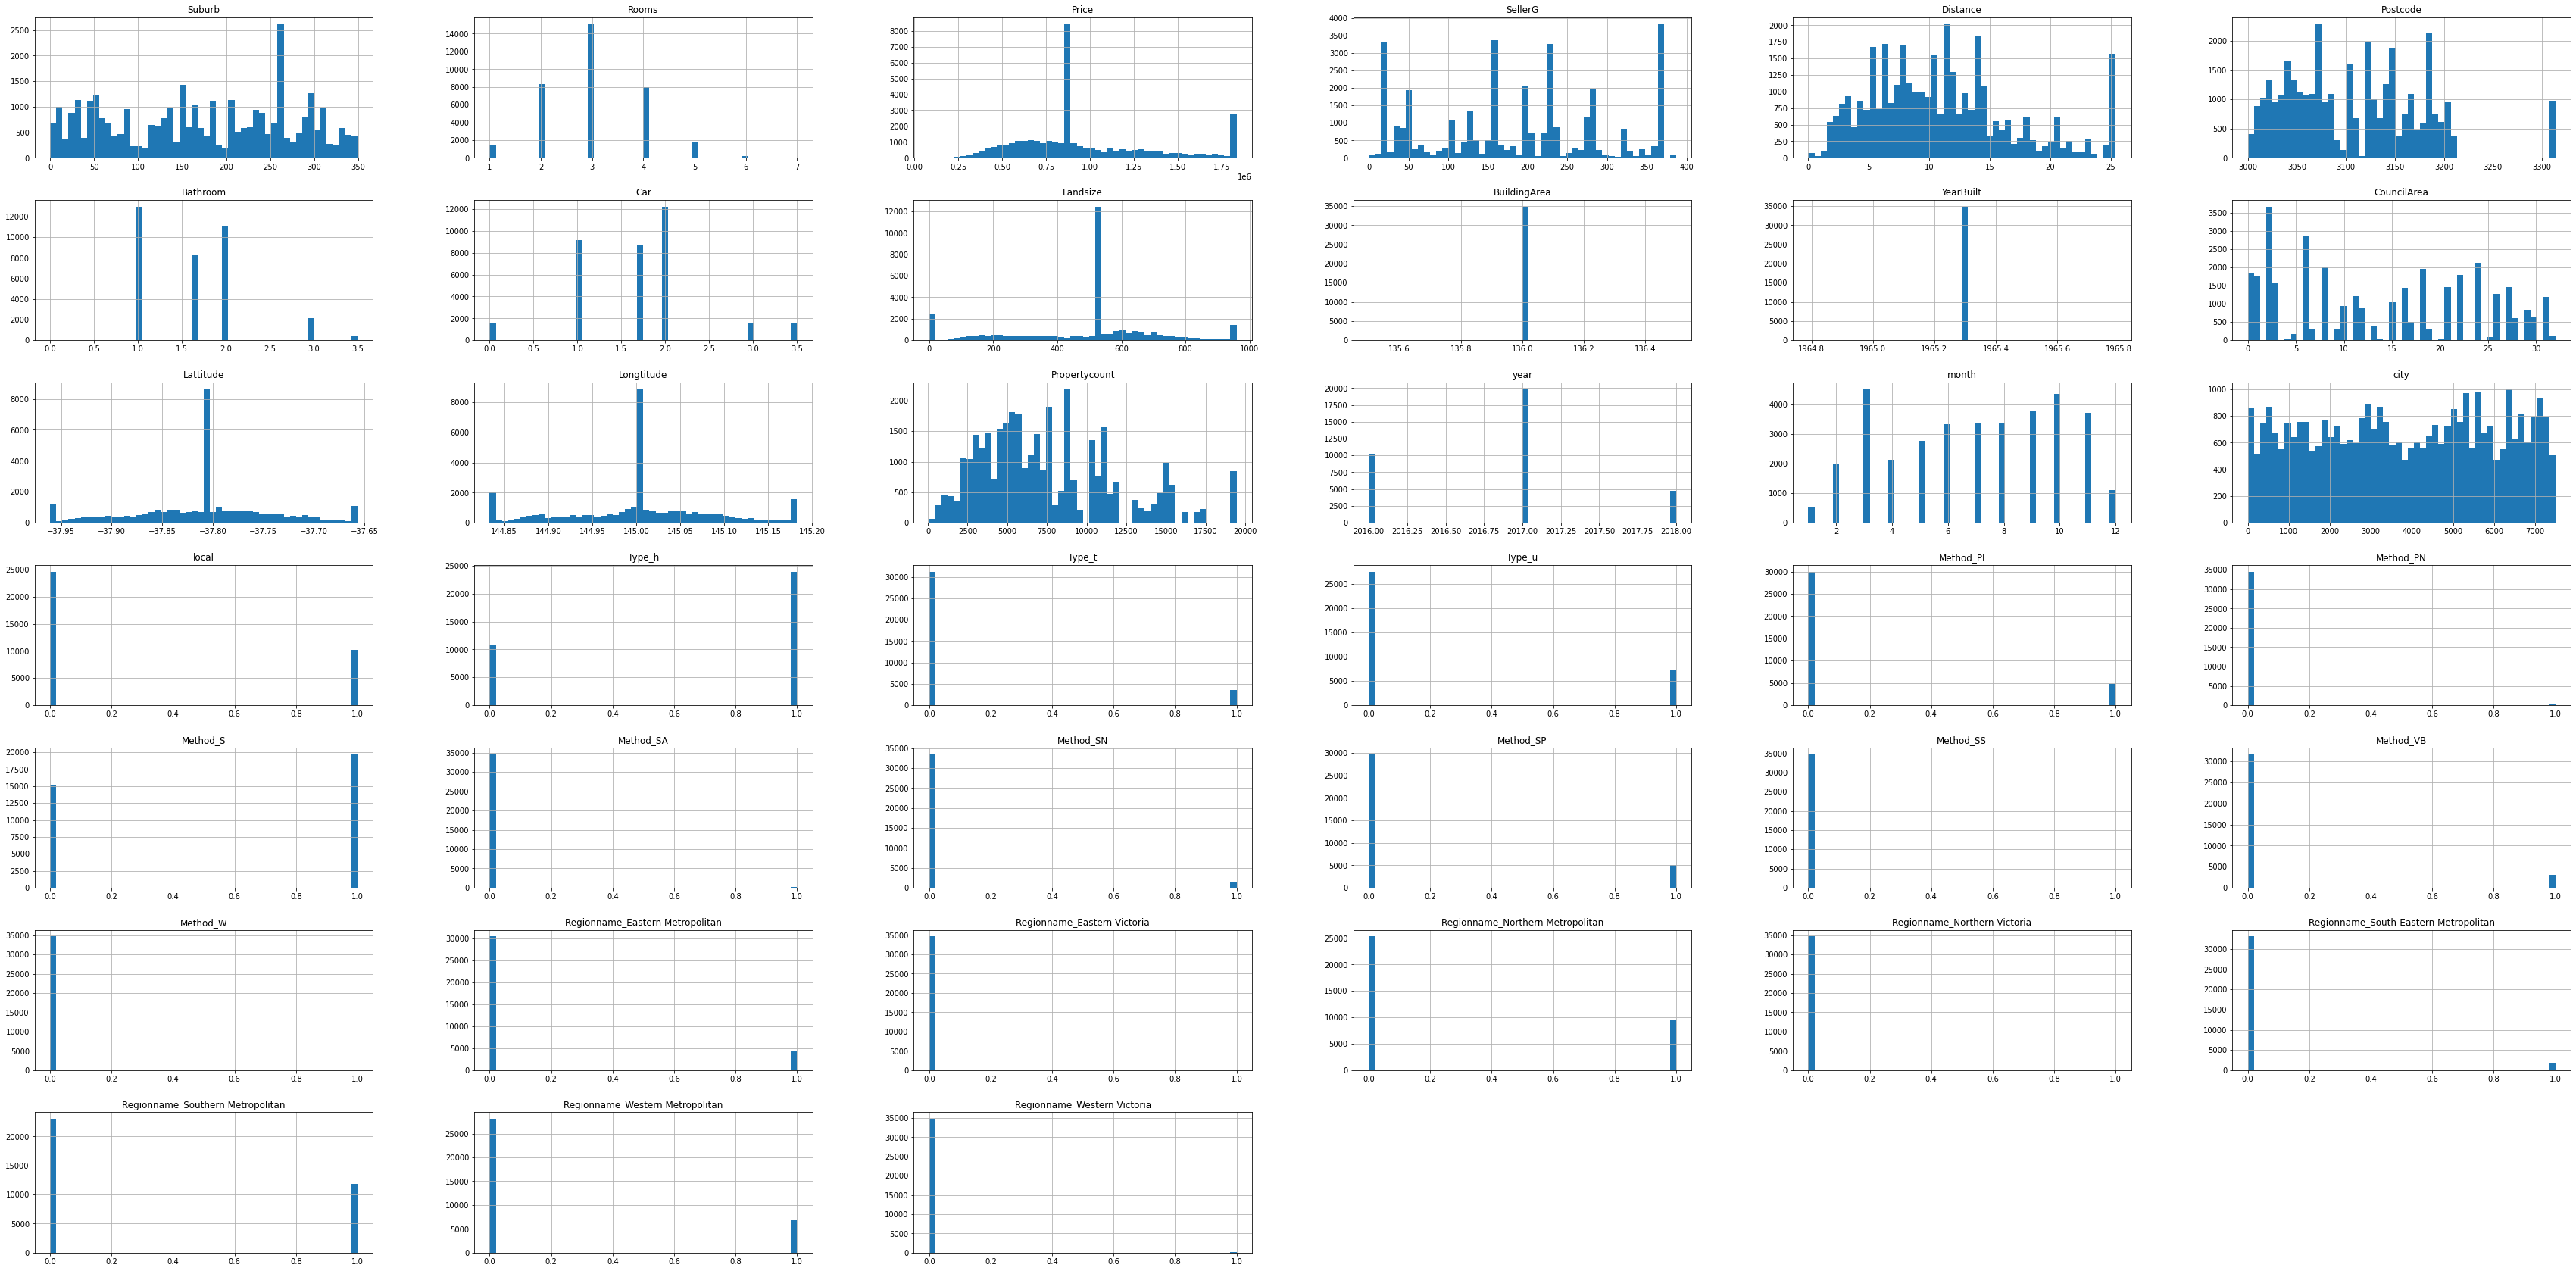

In [34]:
df.hist(bins=50, figsize=(60,30))
plt.show()

In [35]:
# col_std = ['Lattitude', 'Longtitude','Distance', 'Price']
# for column_name in col_std:
#   sns.kdeplot(df[column_name])
#   plt.show()

In [36]:
# col_nor =  ['Suburb', 'Address', 'Rooms', 'SellerG', 'Postcode',
#        'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
#        'CouncilArea', 'Propertycount', 'years', 'months', 'days']
# for column_name in col_nor:
#     sns.kdeplot(df[column_name])
#     plt.show()

In [37]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# f_std = df[col_std].values
# scaler_std = sc.fit(f_std)
# f_std = sc.transform(f_std)

In [38]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# f_mm = df[col_nor].values
# scaler_mm = mm.fit(f_mm)
# f_mm = mm.transform(f_mm)

In [39]:
# df[col_std] = f_std
# df[col_nor] = f_mm

In [40]:
# df.hist(bins=50, figsize=(60,30))
# plt.show()

In [41]:
df

,Suburb,Rooms,Price,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,...,Method_VB,Method_W,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,2.0,870000.0,155,2.5,3067.0,1.000000,1.000000,126.0,136.0,...,0,0,0,0,1,0,0,0,0,0
1,0,2.0,1480000.0,33,2.5,3067.0,1.000000,1.000000,202.0,136.0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1035000.0,33,2.5,3067.0,1.000000,0.000000,156.0,136.0,...,0,0,0,0,1,0,0,0,0,0
3,0,3.0,870000.0,296,2.5,3067.0,2.000000,1.000000,0.0,136.0,...,1,0,0,0,1,0,0,0,0,0
4,0,3.0,1465000.0,33,2.5,3067.0,2.000000,0.000000,134.0,136.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,347,4.0,1480000.0,152,6.3,3013.0,1.000000,3.000000,593.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34853,347,2.0,888000.0,321,6.3,3013.0,2.000000,1.000000,98.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34854,347,2.0,705000.0,152,6.3,3013.0,1.000000,2.000000,220.0,136.0,...,0,0,0,0,0,0,0,0,1,0
34855,347,3.0,1140000.0,370,6.3,3013.0,1.624798,1.728845,521.0,136.0,...,0,0,0,0,0,0,0,0,1,0


## Splitting the dataset (X = data, y = output) into the Training set and Test set

In [42]:
from sklearn.preprocessing import MinMaxScaler

train_x = df.drop(['Price'], axis=1)
train_y = df['Price']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

new_train_x = scaler_x.fit_transform(train_x)
new_train_y = scaler_y.fit_transform(np.array(train_y).reshape(-1, 1))

# Training Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(new_train_x, new_train_y, test_size=0.2)

rf_model = LinearRegression()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_valid) 

# Evaluate the model

In [44]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('R_Square:', metrics.r2_score(y_valid, y_pred))


MAE:  0.1278678656854814
MSE: 0.026102597915382535
RMSE: 0.1615629843602257
R_Square: 0.47636756621011633


# Non-Features scale

# Keras

# Visualization